Instalando bibliotecas necessárias para análise do grafo.

In [ ]:
!pip install osmnx

Agora, gerando o grafo de Blumenau, cidade escolhida pela equipe para realizar o trabalho.

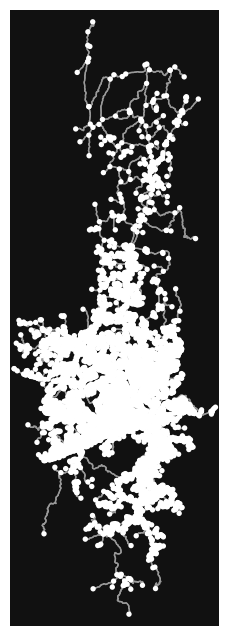

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [2]:
import networkx as nx
import osmnx as ox

PLACE = 'Blumenau, Brazil'

G: nx.MultiDiGraph = ox.graph_from_place(
    PLACE,
    network_type='drive'
)

ox.plot_graph(G)

Próximo passo é importar os dados das planilhas para o grafo. Para este processo, foram coletadas longitude (x) e latitude (y) de cada ponto de interesse e no grafo vamos atribuir um "label" e "nome" para o vértice mais próximo ao ponto de interesse desejado. Ou seja, para o Hospital Santa Isabel, por exemplo, o vértice mais próximo da coordenada que informamos no dataframe vai ser utilizado.

Dados:

- hospitais públicos e privados
- escolas públicas (municipais) e privadas
- creches
- pontos de saúde (AGs, ESFs e Laboratórios)
- centros de atendimento social e psicológico (CRAS e CAPS)

In [3]:
import pandas as pd
import networkx as nx

"""
  Labels with `label` the points of interest from a `dataframe` in a graph `G`.
"""
def label_points_of_interest(G: nx.MultiDiGraph, dataframe: pd.DataFrame, label: str):
  for idx, row in df.iterrows():
    x = row['x']
    y = row['y']
    name = row['name']

    nearest_node_from_interest_point = ox.distance.nearest_nodes(G, X=x, Y=y)

    G.nodes[nearest_node_from_interest_point]['name'] = name
    G.nodes[nearest_node_from_interest_point]['label'] = label

dataframes = {
    'hospital': 'https://raw.githubusercontent.com/lemuel-manske/city-block/main/data/hospitals.csv',
}

for label, url in dataframes.items():
  df = pd.read_csv(url)
  label_points_of_interest(G, df, label)

Primeiro, vamos evidenciar os vértices que representam cada integrante do grupo, em cor azul:

<Axes: >

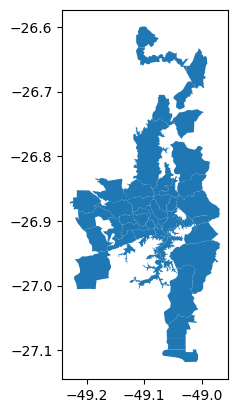

In [7]:
import osmnx as ox

PLACE = 'Blumenau, Brazil'

neighborhood_tags = { 'admin_level': '10' } # https://wiki.openstreetmap.org/wiki/Key:admin_level

neighborhoods = ox.features.features_from_place(PLACE, neighborhood_tags)

neighborhoods.plot()